# CETM46 – Data Science Product Development
## Automated Defect Detection and Prediction in Engineering Processes Using Machine Learning: A Case Study on Casting Quality Control
- Name: Esther Egba
- Student ID.: BI53DT
- Course: MSc Data Science
- **School of Computer Science - University of Sunderland (2023/4 - Sunderland - ASUND)**

### CASTING DEFECT DETECTION
- These all photos are top view of submersible pump impeller.
- The dataset contains total 7348 image data. These all are the size of (300*300) pixels grey-scaled images. In all images, augmentation already applied.
- There are mainly two categories ('Defective' and 'OK').
- Link to the Dataset: https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product  

In [1]:
!pip install np

  Preparing metadata (setup.py) ... done
  Created wheel for np: filename=np-1.0.2-py3-none-any.whl size=13657 sha256=2988fbf65b7d1659fa32304c169f452b3fcdeb0bd86f762c47a9bebee259138e
  Stored in directory: /Users/esther/Library/Caches/pip/wheels/7a/3f/06/2b6d30084f61d12400456d8278def310c39e8c8e47132b11c7
Successfully built np


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 MB 6.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 9.1 MB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 7.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 8.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.6/393.6 kB 9.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 8.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 8.1 MB/s eta 

In [6]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 9.1 MB/s eta 0:00:0000:0100:01


In [8]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 443.4 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 3.5 MB/s eta 0:00:00


In [9]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [10]:
# Paths to the directories containing the images of submersible pump impeller
OK_DIR = "Dataset/casting/ok_front/"
DEF_DIR = "Dataset/casting/def_front/"

# okay is a list that contains the filenames of the 'OK' or non-defective images in the OK_DIR
okay = os.listdir(OK_DIR)

# defective is a list that contains the filenames of the 'Defective' images in the DEF_DIR
defective = os.listdir(DEF_DIR)

In [11]:
'''
Constructs the full path of each 'OK' image by concatenating the directory path (OK_DIR) with the filename (okay[i]).
Finally appends each full path to the okay_paths list.
'''
okay_paths = []
for i in tqdm(range(0, len(okay))):
    okay_path = OK_DIR + okay[i]
    okay_paths.append(okay_path)


'''
Constructs the full path of each 'Defective' image by concatenating the directory path (DEF_DIR) with the filename (defective[i]).
Finally appends each full path to the defective_paths list.
'''
defective_paths = []
for i in tqdm(range(0, len(defective))):
    defective_path = DEF_DIR + defective[i]
    defective_paths.append(defective_path)

100%|██████████| 781/781 [00:00<00:00, 3394561.06it/s]


In [12]:
# Creates a numpy array of ones with a length equal to the number of 'OK' images.
okay_labels = np.ones(len(okay_paths)) # 1 = NON DEFECTIVE

# Creates a numpy array of zeros with a length equal to the number of 'Defective' images.
defective_labels = np.zeros(len(defective_paths)) # 0 = DEFECTIVE

In [13]:
# Concatenates the okay_paths and defective_paths lists into a single numpy array named train_paths.
train_paths = np.concatenate([
    np.array(okay_paths),
    np.array(defective_paths)
])

# Concatenates the okay_labels and defective_labels numpy arrays into a single numpy array named train_labels.
train_labels = np.concatenate([
    okay_labels,
    defective_labels
])

In [14]:
# Creating a DataFrame to store the image paths and labels, and shuffling the DataFrame.
df = pd.DataFrame({"PATHS":train_paths, "LABELS":train_labels})
df = df.sample(frac = 1, )
df

PATHS  LABELS
1271  Dataset/casting/def_front/cast_def_0_3454.jpeg     0.0
1174  Dataset/casting/def_front/cast_def_0_7420.jpeg     0.0
310     Dataset/casting/ok_front/cast_ok_0_5728.jpeg     1.0
741   Dataset/casting/def_front/cast_def_0_6777.jpeg     0.0
783   Dataset/casting/def_front/cast_def_0_8227.jpeg     0.0
...                                              ...     ...
90      Dataset/casting/ok_front/cast_ok_0_5326.jpeg     1.0
283     Dataset/casting/ok_front/cast_ok_0_4031.jpeg     1.0
700   Dataset/casting/def_front/cast_def_0_7664.jpeg     0.0
1038  Dataset/casting/def_front/cast_def_0_3487.jpeg     0.0
1296   Dataset/casting/def_front/cast_def_0_571.jpeg     0.0

[1300 rows x 2 columns]

In [15]:
# Extracting the image paths and labels from the DataFrame.
paths = np.array(df.PATHS)
labels = np.array(df.LABELS)

In [16]:
# splitting the dataset into training and validation sets
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(paths, labels, test_size = 0.2)

ModuleNotFoundError: No module named 'sklearn'

In [10]:
# Defines a function that takes an image path and label then returns the preprocessed image and its corresponding label.
def load_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, size=(256, 256))
    image = tf.cast(image, dtype= tf.float32)/255
    return image, label

# Creates a TensorFlow dataset from the training image paths and labels
train_dataset = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))

# Applies the load_image function to each element in the dataset to load and preprocess the images.
train_dataset = train_dataset.map(load_image)

# Shuffles the training dataset.
train_dataset = train_dataset.shuffle(buffer_size=500)

# Batches the dataset into batches of size 32
train_dataset = train_dataset.batch(32)

# Prefetches the data to optimize GPU memory usage.
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)


# Creates a TensorFlow dataset from the validation image paths and labels.
val_dataset = tf.data.Dataset.from_tensor_slices((xval, yval))

# Applies the load_image function to each element in the dataset to load and preprocess the images.
val_dataset = val_dataset.map(load_image)

# Shuffles the validation dataset.
val_dataset = val_dataset.shuffle(buffer_size=500)

# Batches the dataset into batches of size 32.
val_dataset = val_dataset.batch(32)

# Prefetches the data to optimize GPU memory usage.
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

# Returns the training and validation datasets.
train_dataset, val_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

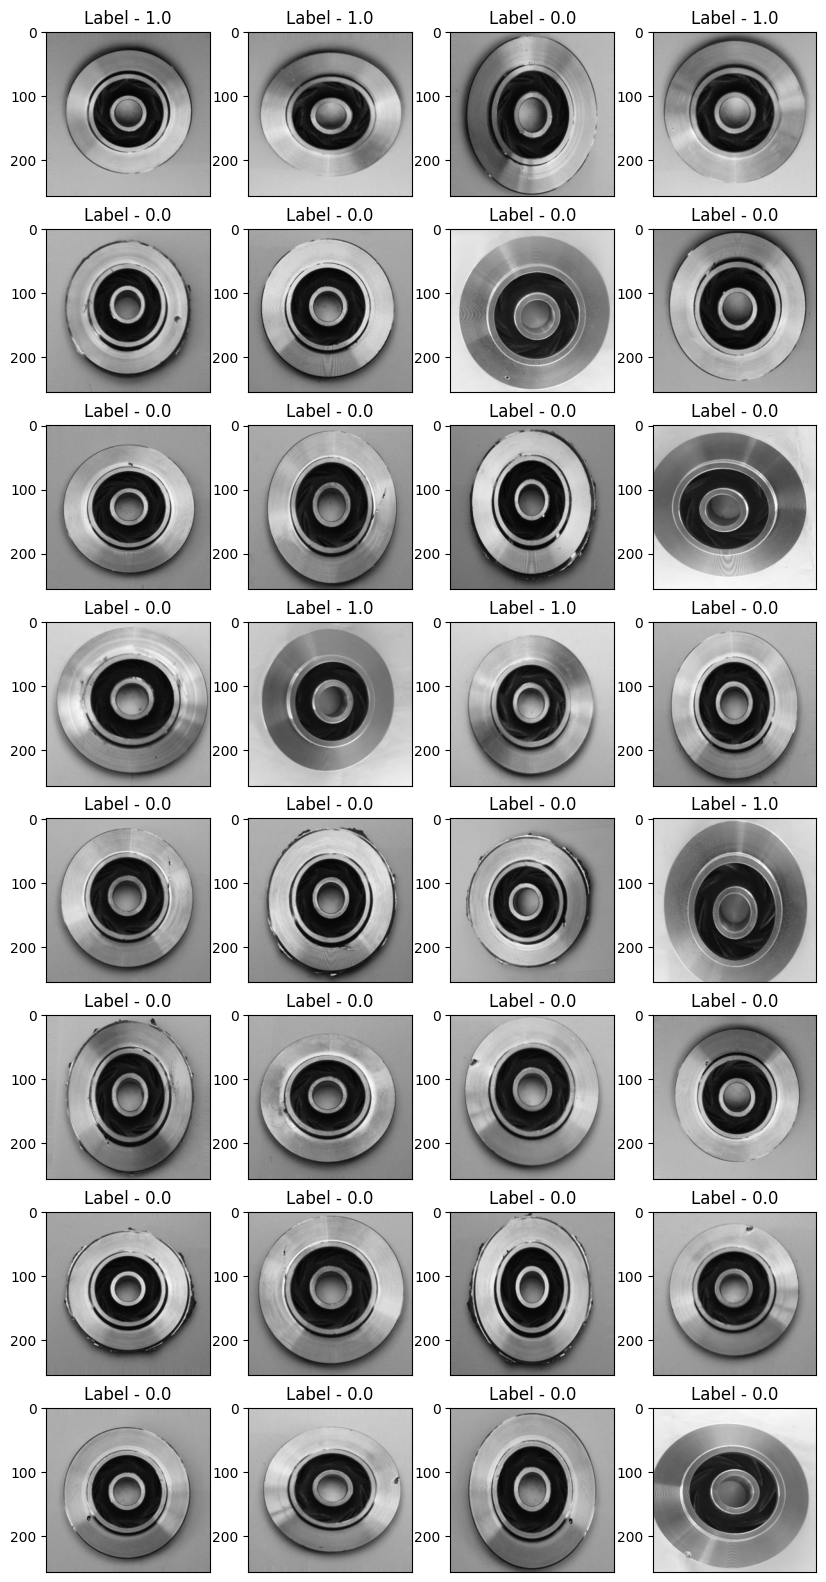

In [11]:
# Retrieves the next batch of images and labels from the train_dataset.
images, labels = next(iter(train_dataset))

# Creates a grid of subplots to display 32 images (8 rows and 4 columns).
fig, ax = plt.subplots(8, 4, figsize = (10, 20))
for i in range(8):
    for j in range(4):
        ax[i][j].imshow(images[4*i+j])
        ax[i][j].set_title(f"Label - {labels[4*i+j]}")
        ax[i][j].set_xticks([])

# Displays the plot with the batch of images and their corresponding labels.
plt.show() 


## Application of Machine Learning Models in classifying the submersible pump impeller images

### Method 1: The implementation of a Random Forest Classifier using Sklearn in classifying the submersible pump impeller images


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Function to read and preprocess images
def preprocess_image(image_path):
    if isinstance(image_path, str):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (256, 256))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        image = image_path.numpy()
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (256, 256))
    return image.flatten()

In [14]:
# Flatten the image arrays and convert them to numpy arrays
xtrain_flat = np.array([preprocess_image(img) for img in xtrain])
xval_flat = np.array([preprocess_image(img) for img in xval])
#xtest_flat = np.array([preprocess_image(img) for img in xtest])

In [15]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(xtrain_flat, ytrain)

RandomForestClassifier(random_state=42)

In [16]:
# Predict on validation set
ypred_rf = rf_classifier.predict(xval_flat)

In [17]:
# Convert predicted and true labels to string labels
result_rf = ["NON-DEFECTIVE" if pred == 1 else "DEFECTIVE" for pred in ypred_rf]
true_rf = ["NON-DEFECTIVE" if label == 1 else "DEFECTIVE" for label in yval]

In [18]:
# Generating the classification report
rep_rf = pd.DataFrame(classification_report(yval, ypred_rf, output_dict=True))

rep_rf  # Displays the classification report in a tabular format

0.0         1.0  accuracy   macro avg  weighted avg
precision    0.939597    0.891892  0.919231    0.915745      0.919781
recall       0.921053    0.916667  0.919231    0.918860      0.919231
f1-score     0.930233    0.904110  0.919231    0.917171      0.919381
support    152.000000  108.000000  0.919231  260.000000    260.000000

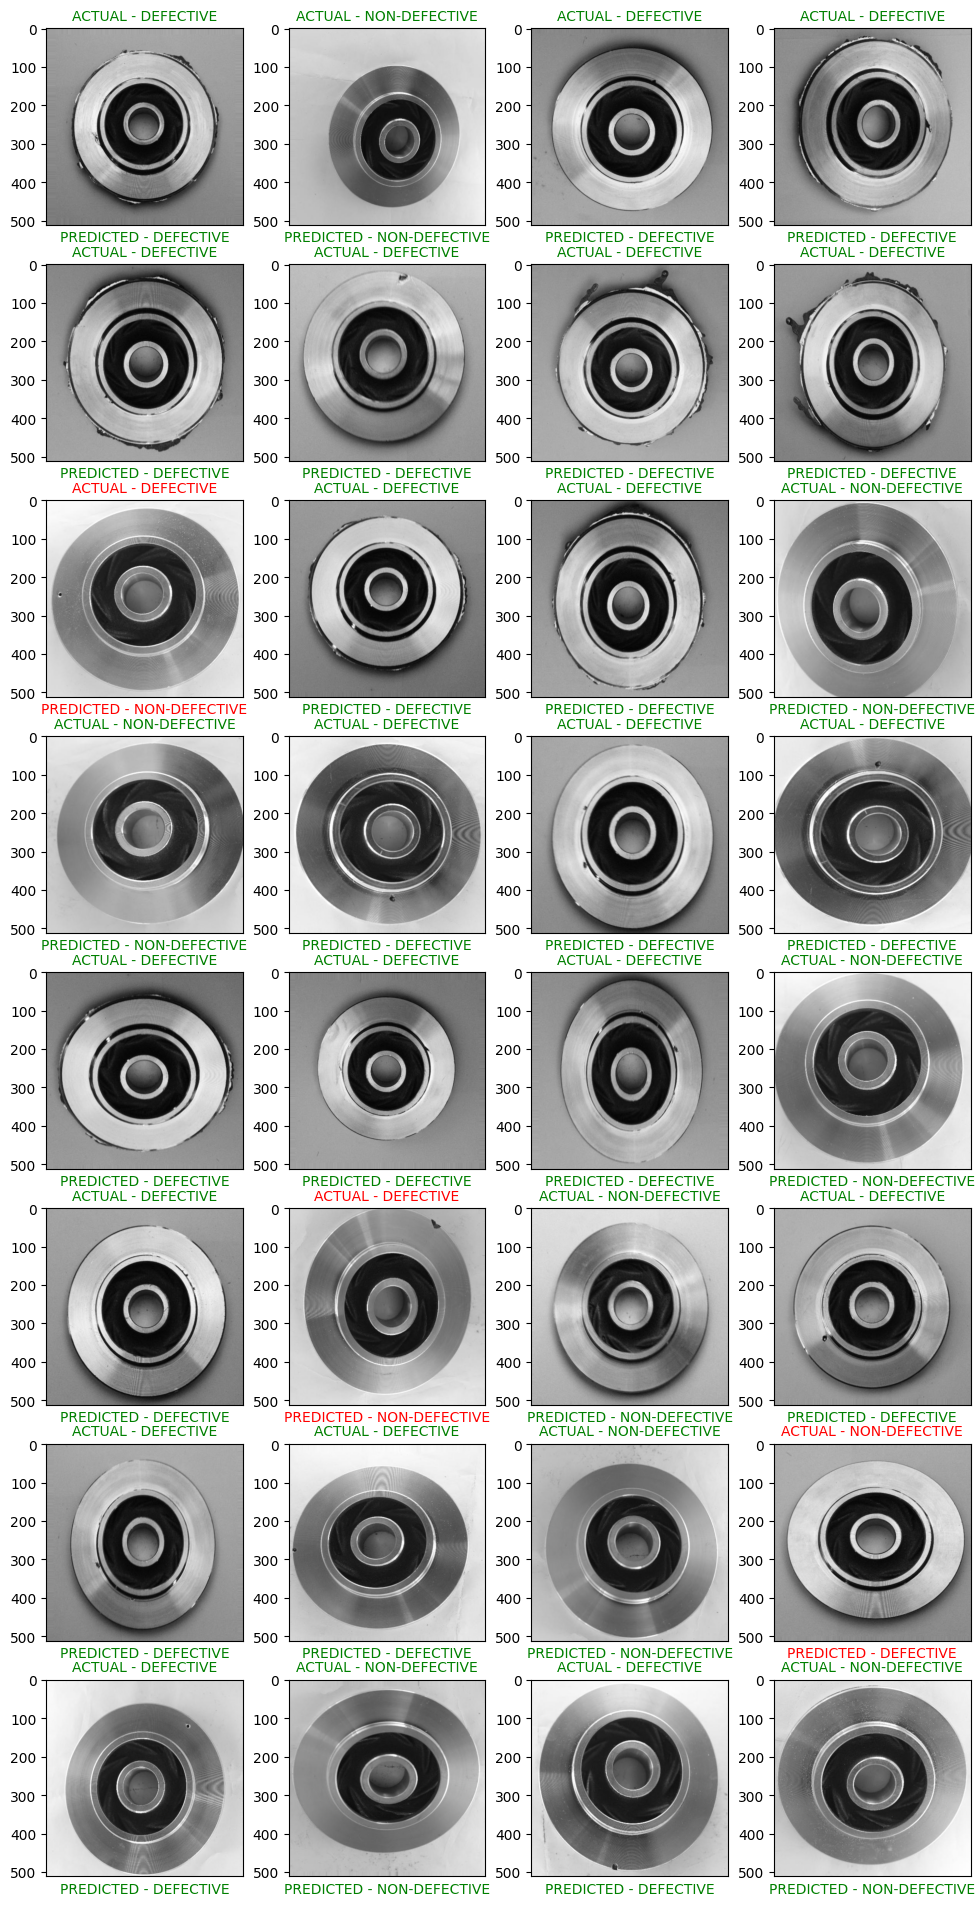

In [19]:
# Display images with predicted and actual labels for Random Forest
fig, ax = plt.subplots(8, 4, figsize=(12, 24))  # Creates an 8x4 grid of subplots for displaying the images

for i in range(8):
    for j in range(4):
        if isinstance(xval[4*i+j], str):
            image = cv2.cvtColor(cv2.imread(xval[4*i+j], cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
        else:
            image = xval[4*i+j].numpy()
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        ax[i][j].imshow(image)
        
        if ypred_rf[4*i+j] == yval[4*i+j]:
            ax[i][j].set_title(f"ACTUAL - {true_rf[4*i+j]}", color="green", size=10)
            ax[i][j].set_xlabel(f"PREDICTED - {result_rf[4*i+j]}", color="green", size=10)
        else:
            ax[i][j].set_title(f"ACTUAL - {true_rf[4*i+j]}", color="red", size=10)
            ax[i][j].set_xlabel(f"PREDICTED - {result_rf[4*i+j]}", color="red", size=10)
        
        ax[i][j].set_xticks([])

plt.show()

### Method 2: The implementation of a Support Vector Machine (SVM) using Sklearn in classifying the submersible pump impeller images

In [20]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(xtrain_flat, ytrain)

SVC(kernel='linear', random_state=42)

In [21]:
# Predict on validation set
ypred_svm = svm_classifier.predict(xval_flat)

In [22]:
# Convert predicted and true labels to string labels
result_svm = ["NON-DEFECTIVE" if pred == 1 else "DEFECTIVE" for pred in ypred_svm]
true_svm = ["NON-DEFECTIVE" if label == 1 else "DEFECTIVE" for label in yval]

In [23]:
# Generating the classification report
rep_svm = pd.DataFrame(classification_report(yval, ypred_svm, output_dict=True))

rep_svm  # Displays the classification report in a tabular format

0.0         1.0  accuracy   macro avg  weighted avg
precision    0.889655    0.800000      0.85    0.844828      0.852414
recall       0.848684    0.851852      0.85    0.850268      0.850000
f1-score     0.868687    0.825112      0.85    0.846899      0.850587
support    152.000000  108.000000      0.85  260.000000    260.000000

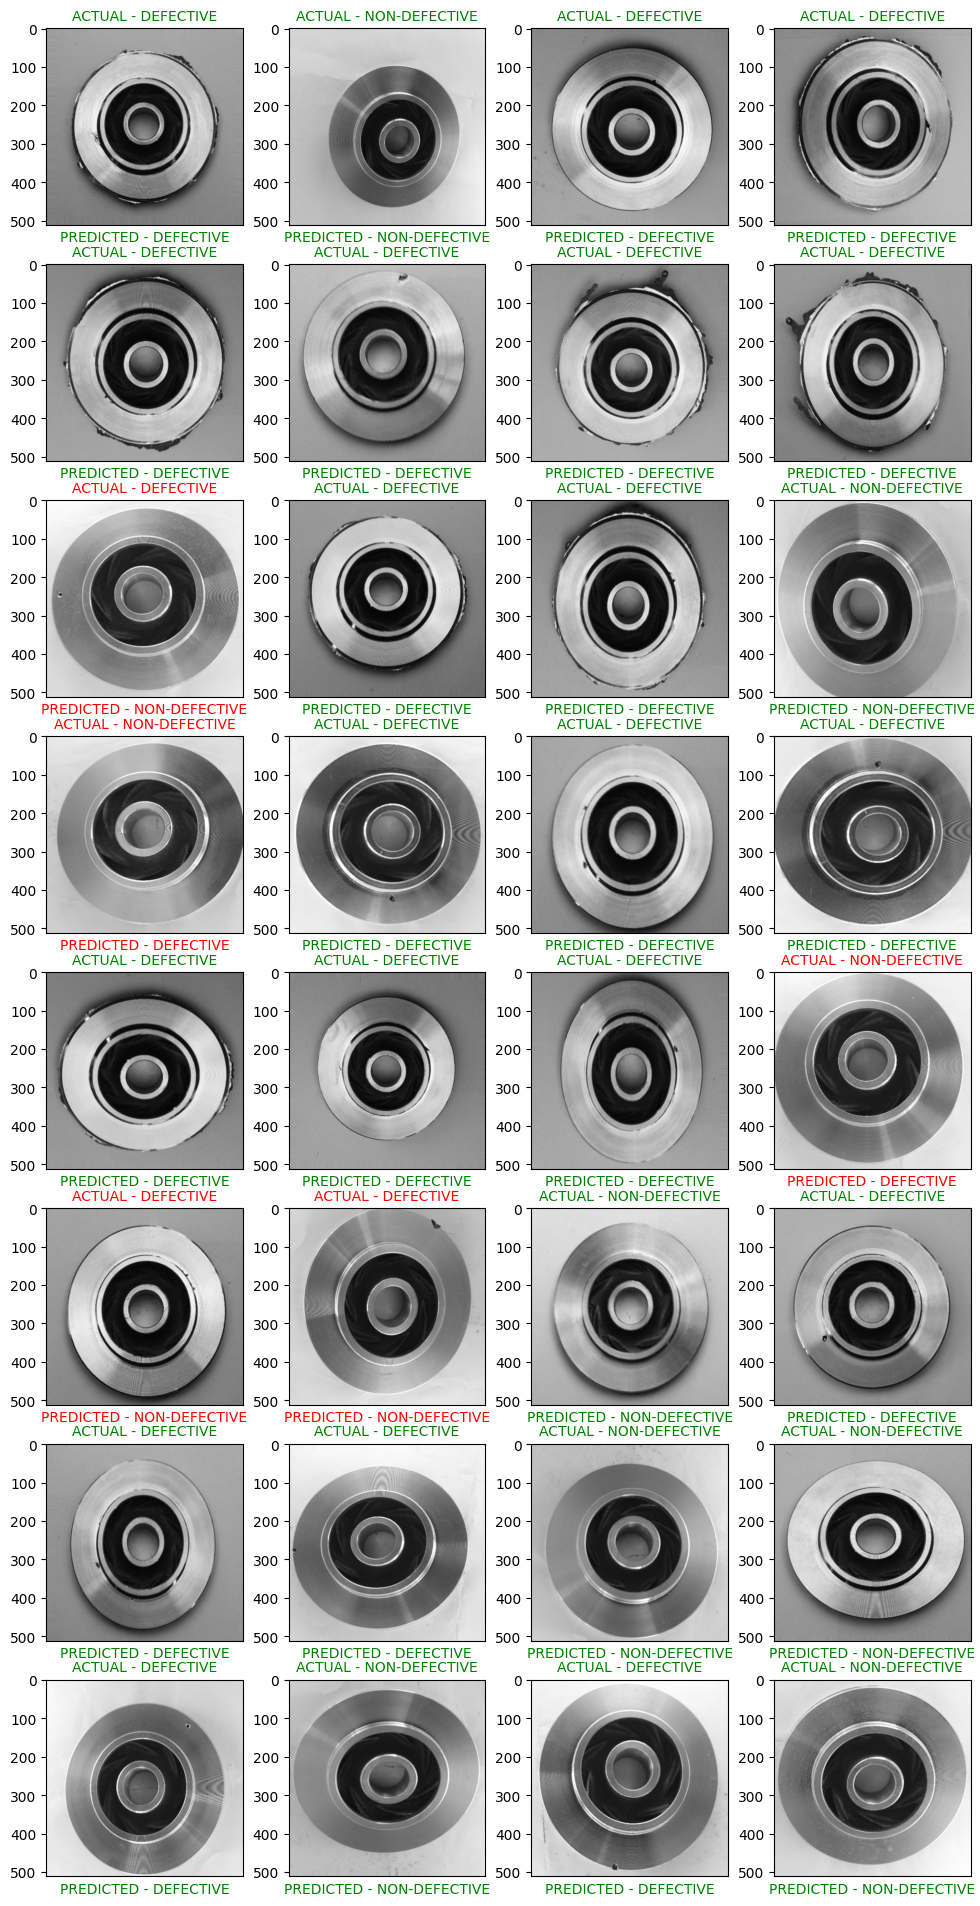

In [24]:
# Display images with predicted and actual labels for SVM
fig, ax = plt.subplots(8, 4, figsize=(12, 24))  # Creates an 8x4 grid of subplots for displaying the images

for i in range(8):
    for j in range(4):
        if isinstance(xval[4*i+j], str):
            image = cv2.cvtColor(cv2.imread(xval[4*i+j], cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
        else:
            image = xval[4*i+j].numpy()
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        ax[i][j].imshow(image)
        
        if ypred_svm[4*i+j] == yval[4*i+j]:
            ax[i][j].set_title(f"ACTUAL - {true_svm[4*i+j]}", color="green", size=10)
            ax[i][j].set_xlabel(f"PREDICTED - {result_svm[4*i+j]}", color="green", size=10)
        else:
            ax[i][j].set_title(f"ACTUAL - {true_svm[4*i+j]}", color="red", size=10)
            ax[i][j].set_xlabel(f"PREDICTED - {result_svm[4*i+j]}", color="red", size=10)
        
        ax[i][j].set_xticks([])

plt.show()

### Method 3: The implementation of a feedforward neural network (FFNN) using TensorFlow/Keras in classifying the submersible pump impeller images

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Define the feedforward neural network model
model_ffnn = Sequential([
    Flatten(input_shape=(256, 256, 3)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model_ffnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 196608)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      25,165,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,174,273 (96.03 MB)

 Trainable params: 25,174,273 (96.03 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train the model
history = model_ffnn.fit(train_dataset, 
                         epochs=10, 
                         validation_data=val_dataset)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 221ms/step - accuracy: 0.5169 - loss: 36.2092 - val_accuracy: 0.5769 - val_loss: 0.6930
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 222ms/step - accuracy: 0.5880 - loss: 0.6922 - val_accuracy: 0.5846 - val_loss: 0.6900
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 218ms/step - accuracy: 0.6212 - loss: 0.6884 - val_accuracy: 0.5846 - val_loss: 0.6871
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - accuracy: 0.6402 - loss: 0.6840 - val_accuracy: 0.5846 - val_loss: 0.6872
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - accuracy: 0.6064 - loss: 0.6838 - val_accuracy: 0.5846 - val_loss: 0.6859
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - accuracy: 0.5953 - loss: 0.6832 - val_accuracy: 0.5846 - val_loss: 0.6779
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 218ms/step - accuracy: 0.6151 - loss: 0.6785 - val_accuracy: 0.5846 - val_loss: 0.6921
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.6239 - loss: 0.6757 - val_accuracy: 0

In [29]:
'''
Extracting a batch of test data from the validation dataset
xtest: Contains a batch of preprocessed images from the validation dataset
ytest: Contains the corresponding labels for the images in xtest
'''
xtest, ytest = next(iter(val_dataset))

In [30]:
# Making predictions on the test data and squeezing the predictions to a 1D array
ypred = model_ffnn.predict(xtest)
ypred = np.squeeze(ypred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


In [31]:
# Converting the predicted probabilities to binary class labels based on a threshold of 0.5
for i in range(0, len(ypred)):
    if ypred[i] > 0.5:
        ypred[i] = 1
    else:
        ypred[i] = 0

In [32]:
# Generating a classification report
from sklearn.metrics import classification_report
rep = pd.DataFrame(classification_report(ytest, ypred, output_dict = True))

rep # Displays the classification report in a tabular format

0.0   1.0  accuracy  macro avg  weighted avg
precision   0.500000   0.0       0.5   0.250000      0.250000
recall      1.000000   0.0       0.5   0.500000      0.500000
f1-score    0.666667   0.0       0.5   0.333333      0.333333
support    16.000000  16.0       0.5  32.000000     32.000000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

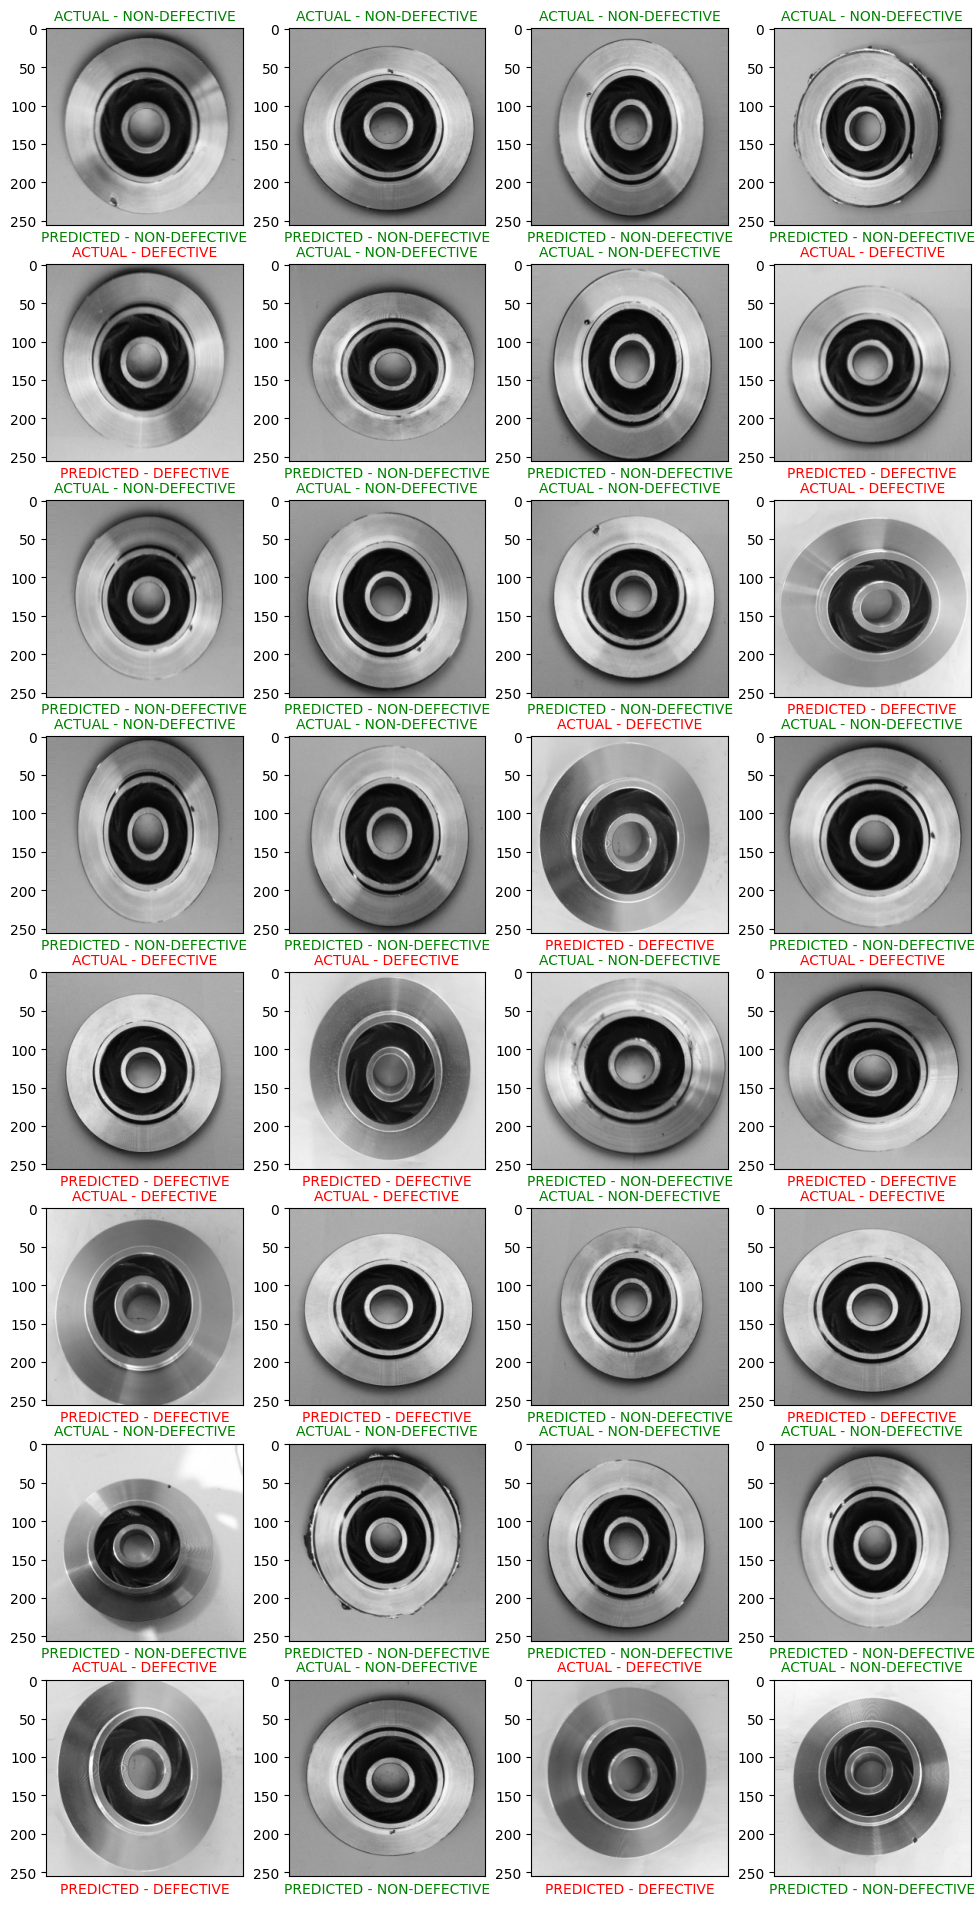

In [33]:
# Display images with predicted and actual labels for Feedforward Neural Network
fig, ax = plt.subplots(8, 4, figsize=(12, 24))  # Creates an 8x4 grid of subplots for displaying the images

for i in range(8):
    for j in range(4):
        ax[i][j].imshow(images[4*i+j])
        
        # Predict the label for the image
        img_array = tf.expand_dims(images[4*i+j], axis=0)  # Expand dimensions to match model input shape
        prediction = model_ffnn.predict(img_array)
        
        if prediction[0][0] > 0.5:
            pred_label = "NON-DEFECTIVE"
        else:
            pred_label = "DEFECTIVE"
        
        if labels[4*i+j].numpy() == (prediction > 0.5):
            ax[i][j].set_title(f"ACTUAL - NON-DEFECTIVE", color="green", size=10)
            ax[i][j].set_xlabel(f"PREDICTED - NON-DEFECTIVE", color="green", size=10)
        else:
            ax[i][j].set_title(f"ACTUAL - DEFECTIVE", color="red", size=10)
            ax[i][j].set_xlabel(f"PREDICTED - DEFECTIVE", color="red", size=10)
        
        ax[i][j].set_xticks([])

plt.show()

### Method 4: The implementation of a convolutional neural network (CNN) using TensorFlow/Keras in classifying the submersible pump impeller images

In [136]:
# creating a convolutional neural network (CNN) model using MobileNetV2 as a base model
from tensorflow.keras.applications import MobileNetV2 # Imports the MobileNetV2 pre-trained model

base_model = MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = 'imagenet')

# Freezing the weights of the base MobileNetV2 model, so they will not be updated during training
for layer in base_model.layers:
    layer.trainable = False

# Defines the sequential model architecture 
model_cnn = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
])

'''
optimizer="adam": Uses the Adam optimizer for training the model.
loss='binary_crossentropy': Binary cross-entropy loss function for binary classification
metrics=['accuracy']: Evaluates the model performance using accuracy metric
'''
model_cnn.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

# Displays the summary of the model architecture, including the layers and the number of trainable parameters
model_cnn.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ ?                           │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [137]:
# Training the model using the training and validation datasets
model_cnn.fit(train_dataset,
         epochs = 10,
          validation_data = val_dataset
         )

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 866ms/step - accuracy: 0.6588 - loss: 11.2608 - val_accuracy: 0.8654 - val_loss: 0.6931
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 812ms/step - accuracy: 0.9321 - loss: 0.2769 - val_accuracy: 0.9808 - val_loss: 0.0503
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 816ms/step - accuracy: 0.9781 - loss: 0.0475 - val_accuracy: 0.9962 - val_loss: 0.0201
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 829ms/step - accuracy: 0.9962 - loss: 0.0218 - val_accuracy: 0.9962 - val_loss: 0.0101
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 840ms/step - accuracy: 0.9919 - loss: 0.0178 - val_accuracy: 0.9923 - val_loss: 0.0309
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 813ms/step - accuracy: 0.9955 - loss: 0.0125 - val_accuracy: 0.9962 - val_loss: 0.0094
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 819ms/step - accuracy: 0.9996 - loss: 0.0052 - val_accuracy: 0.9962 - val_loss: 0.0062
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 815ms/step - accuracy: 0.9971 - loss: 0.0080 - val_acc

In [138]:
'''
Extracting a batch of test data from the validation dataset
xtest: Contains a batch of preprocessed images from the validation dataset
ytest: Contains the corresponding labels for the images in xtest
'''
xtest, ytest = next(iter(val_dataset))

In [139]:
# Making predictions on the test data and squeezing the predictions to a 1D array
ypred = model_cnn.predict(xtest)
ypred = np.squeeze(ypred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [140]:
# Converting the predicted probabilities to binary class labels based on a threshold of 0.5
for i in range(0, len(ypred)):
    if ypred[i] > 0.5:
        ypred[i] = 1
    else:
        ypred[i] = 0

In [141]:
# Generating a classification report
from sklearn.metrics import classification_report
rep = pd.DataFrame(classification_report(ytest, ypred, output_dict = True))

rep # Displays the classification report in a tabular format

0.0   1.0  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    19.0  13.0       1.0       32.0          32.0

In [142]:
# Displays the ypred array containing the predicted class labels for the test data.
ypred

array([1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.],
      dtype=float32)

In [143]:
# Converting the binary class labels in ypred to string labels ("DEFECTIVE" or "NON-DEFECTIVE")
result = []
for i in range(len(ypred)):
    if ypred[i] == 0:
        result.append("DEFECTIVE")
    else:
        result.append("NON-DEFECTIVE")
result

['NON-DEFECTIVE',
 'DEFECTIVE',
 'NON-DEFECTIVE',
 'DEFECTIVE',
 'DEFECTIVE',
 'NON-DEFECTIVE',
 'DEFECTIVE',
 'DEFECTIVE',
 'DEFECTIVE',
 'NON-DEFECTIVE',
 'DEFECTIVE',
 'NON-DEFECTIVE',
 'DEFECTIVE',
 'NON-DEFECTIVE',
 'DEFECTIVE',
 'DEFECTIVE',
 'NON-DEFECTIVE',
 'DEFECTIVE',
 'NON-DEFECTIVE',
 'DEFECTIVE',
 'DEFECTIVE',
 'NON-DEFECTIVE',
 'DEFECTIVE',
 'NON-DEFECTIVE',
 'DEFECTIVE',
 'DEFECTIVE',
 'NON-DEFECTIVE',
 'DEFECTIVE',
 'DEFECTIVE',
 'NON-DEFECTIVE',
 'NON-DEFECTIVE',
 'DEFECTIVE']

In [144]:
# Converting the true binary class labels in ytest to string labels ("DEFECTIVE" or "NON-DEFECTIVE")
true = []
for i in range(len(ytest)):
    if ytest[i] == 0:
        true.append("DEFECTIVE")
    else:
        true.append("NON-DEFECTIVE")

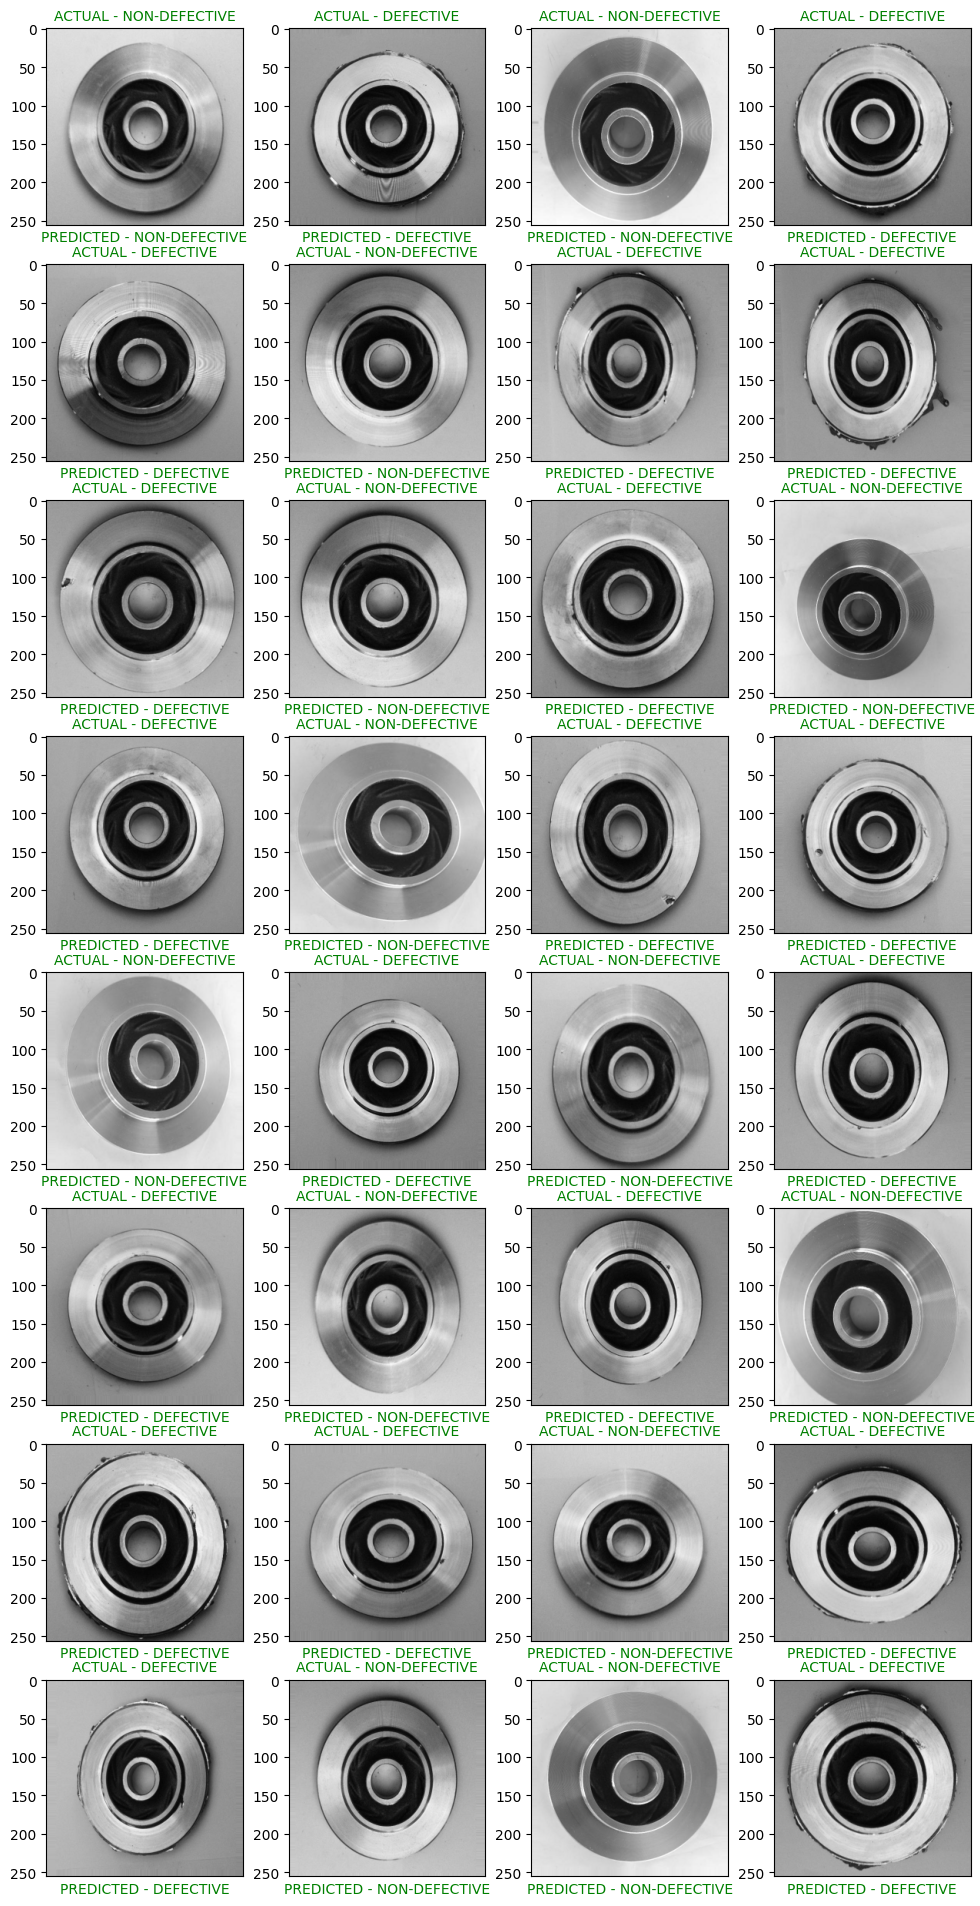

In [145]:
'''
Visualizing the test images along with their actual and predicted labels using Matplotlib
The titles and x-labels will be colored green if the prediction is correct and red if the prediction is incorrec
'''
fig, ax = plt.subplots(8, 4, figsize = (12, 24)) # Creates a 8x4 grid of subplots for displaying the images
for i in range(8):
    for j in range(4):
        ax[i][j].imshow(xtest[4*i+j])
        if ytest[4*i+j] == ypred[4*i+j]:
            ax[i][j].set_title(f"ACTUAL - {(result)[4*i+j]}", color = "green", size = 10)
            ax[i][j].set_xlabel(f"PREDICTED - {true[4*i+j]}", color = "green", size = 10)
        else:
            ax[i][j].set_title(f"ACTUAL - {(result)[4*i+j]}", color = "red", size = 10)
            ax[i][j].set_xlabel(f"PREDICTED - {true[4*i+j]}", color = "red", size = 10)
        ax[i][j].set_xticks([])

Based on the classification reports of the four models implemented, here's a brief analysis of the performance of each model:

### Random Forest Classifier:
- **Accuracy:** 91.92%
- **Precision:** 
  - Class 0 (DEFECTIVE): 93.96%
  - Class 1 (NON-DEFECTIVE): 89.19%
- **Recall:** 
  - Class 0: 92.11%
  - Class 1: 91.67%
- **F1-score:** 
  - Class 0: 93.02%
  - Class 1: 90.41%

### Support Vector Machine (SVM):
- **Accuracy:** 85.00%
- **Precision:** 
  - Class 0: 88.97%
  - Class 1: 80.00%
- **Recall:** 
  - Class 0: 84.87%
  - Class 1: 85.19%
- **F1-score:** 
  - Class 0: 86.87%
  - Class 1: 82.51%

### Feedforward Neural Network (FFNN):
- **Accuracy:** 50.00%
- **Precision:** 
  - Class 0: 50.00%
  - Class 1: 0.00%
- **Recall:** 
  - Class 0: 100.00%
  - Class 1: 0.00%
- **F1-score:** 
  - Class 0: 66.67%
  - Class 1: 0.00%

### Convolutional Neural Network (CNN):
- **Accuracy:** 100.00%
- **Precision:** 
  - Class 0: 100.00%
  - Class 1: 100.00%
- **Recall:** 
  - Class 0: 100.00%
  - Class 1: 100.00%
- **F1-score:** 
  - Class 0: 100.00%
  - Class 1: 100.00%

### Recommendation:

Based on the analysis of the classification reports:

- The **CNN model** significantly outperforms the other models with perfect accuracy, precision, recall, and F1-score for both classes. This indicates that the CNN model has learned the features and patterns in the images effectively and is the most reliable for this classification task.
  
- The **Random Forest Classifier** also performs relatively well, with an accuracy of 91.92% and balanced precision and recall for both classes.

- The **SVM model** and **FFNN** show lower performance in terms of accuracy, precision, recall, and F1-score, making them less reliable for this specific task.

### Conclusion:
The **Convolutional Neural Network (CNN)** is recommended as the best-performing model for classifying submersible pump impeller images due to its perfect performance in all metrics.

### We are going to save the model to the system and then use it to test a single submersible pump impeller image

#### Save and Load the Model in .keras Format

In [146]:
# Check if the directory exists, if not create it
model_directory = './Model/'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

# Save the model in .keras format
loaded_model_path = os.path.join(model_directory, 'model_cnn.keras')
model_cnn.save(loaded_model_path)

#### Reconstruct the Model

In [155]:
# Creating a convolutional neural network (CNN) model using MobileNetV2 as a base model
from tensorflow.keras.applications import MobileNetV2  # Imports the MobileNetV2 pre-trained model

base_model = MobileNetV2(input_shape=(256, 256, 3), include_top=False, weights='imagenet')

# Freezing the weights of the base MobileNetV2 model, so they will not be updated during training
for layer in base_model.layers:
    layer.trainable = False

# Defines the sequential model architecture with named layers
loaded_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(units=256, activation="relu", name='dense_15'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation="sigmoid", name='dense_16'),
])


#### Reloading the model for testing

In [158]:
# Build the model
loaded_model.build(input_shape=(None, 256, 256, 3))

# Load the model weights
loaded_model.load_weights(loaded_model_path)

# Check the model summary
loaded_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 8, 8, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 81920)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │      20,971,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,230,017 (88.62 MB)

 Trainable params: 20,972,033 (80.00 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

#### Testing a single submersible pump impeller image

In [169]:
# Load and preprocess the image
image_path = './images/image.jpeg'
img = cv2.imread(image_path)
img = cv2.resize(img, (256, 256))
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image

In [170]:
# Make predictions
prediction = loaded_model.predict(img)
prediction = np.squeeze(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


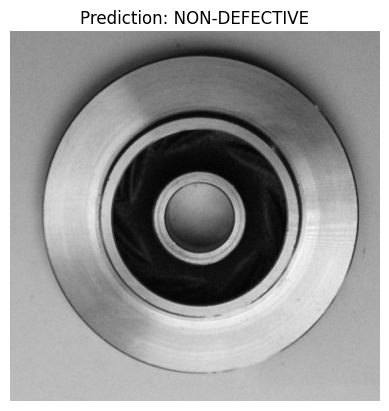

In [171]:
# Convert the predicted probabilities to binary class labels based on a threshold of 0.5
if prediction > 0.5:
    prediction_label = "NON-DEFECTIVE"
else:
    prediction_label = "DEFECTIVE"

# Display the image and the predicted label
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {prediction_label}")
plt.axis('off')
plt.show()